<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### 1.2 We need some data.

In [2]:
x = np.linspace(-np.pi, np.pi, num = 100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### 1.3 Here comes the comparison

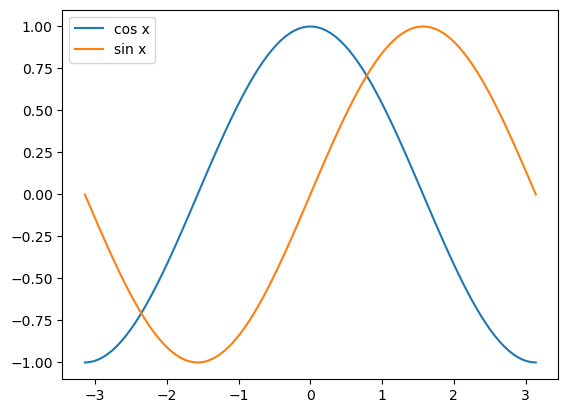

In [3]:
plt.plot(x, cos_x, label = 'cos x')
plt.plot(x, sin_x, label = 'sin x')
plt.legend()
plt.show()

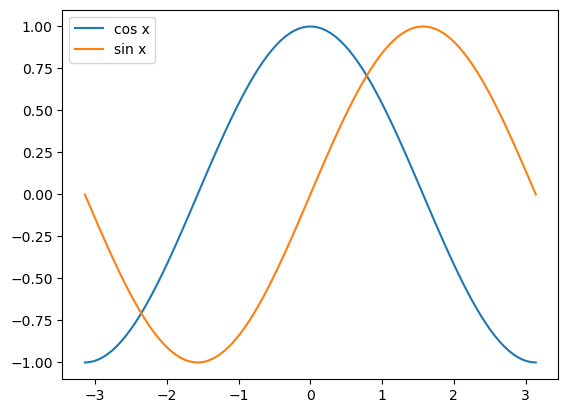

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x, cos_x, label = 'cos x')
ax.plot(x, sin_x, label = 'sin x')
ax.legend()
plt.show()

## 2 Using the OO Interface

### 2.1 Getting ax

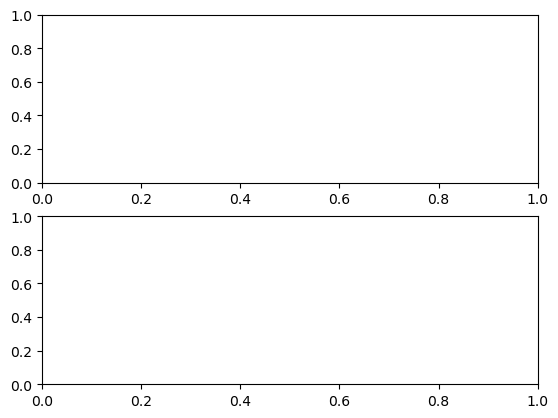

In [14]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)

### 2.2 What is ax

In [8]:
type(ax)

numpy.ndarray

In [9]:
ax.shape

(2,)

In [10]:
type(ax[0])

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

In [13]:
ax[0].plot(x, cos_x, label = 'cos x')

In [15]:
ax[1].plot(x, sin_x, label = 'sin x')

### 2.4 Legends

In [16]:
ax[0].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [17]:
ax[1].legend()

In [18]:
for a in ax:
    a.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
for a in ax:
    a.legend()
    a.grid(alpha = 0.25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### 2.5 Tweaks

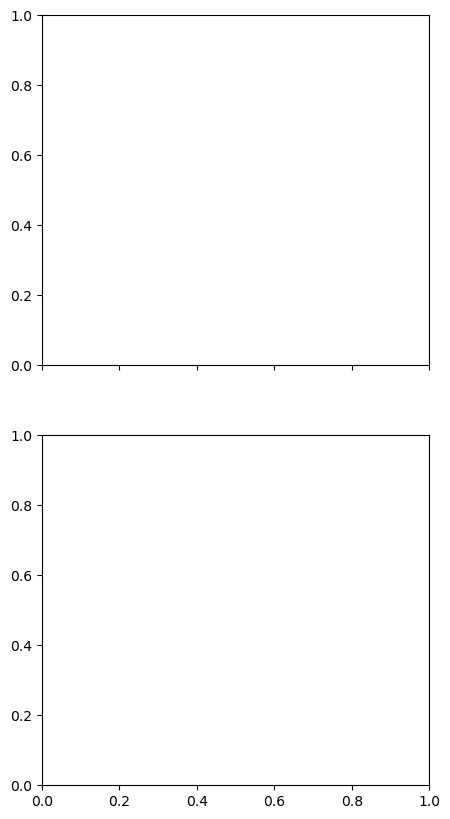

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, 
                      figsize = (5,10),
                      sharex = True)

In [21]:
ax[1].set_xlabel('$x$')

Text(0.5, 4.4444444444444375, '$x$')

In [22]:
ax[0].fill_between(x, 0, cos_x, alpha = 0.25)
ax[1].fill_between(x, 0, sin_x, alpha = 0.25)

In [23]:
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

In [24]:
fig.tight_layout()

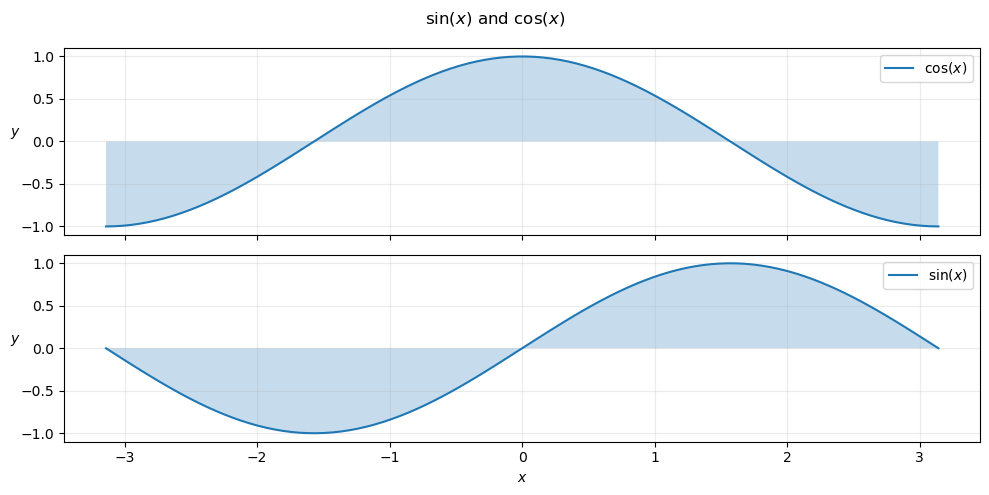

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 1,
                      figsize = (10, 5),
                      sharex = True)
ax[0].plot(x, cos_x, label = r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha = 0.25)
ax[1].plot(x, sin_x, label = r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha = 0.25)

for a in ax:
    a.legend()
    a.grid(alpha = 0.25)
    a.set_ylabel('$y$', rotation = 0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.show()

## 3 More rows and columns

### 3.1 Using ax

In [ ]:
ax[0,0].plot(x1, np.ones_like(x1))
ax[0,1].plot(x2, 2*np.ones_like(x2))
ax[1,0].plot(x1, 3*np.ones_like(x1))
ax[1,1].plot(x2, 4**np.ones_like(x2))

In [ ]:
top_left = ax[0,0]
top_right = ax[0,1]
bottom_left = ax[1,0]
bottom_right = ax[1,1]

In [ ]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

### 3.2 Sharing axes

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,
                      figsize = (10, 4),
                      sharex = True, sharey = 'row')

### 3.3 Accessing all axes

In [ ]:
top_left.grid(alpha = 0.25)
top_right.grid(alpha = 0.25)
bottom_left.grid(alpha = 0.25)
bottom_right.grid(alpha = 0.25)    # very tedious

In [ ]:
for a in ax.flatten():
    a.grid(alpha = 0.25)   #more efficient way 

## 4 Other useful plots

### 4.1 Histograms

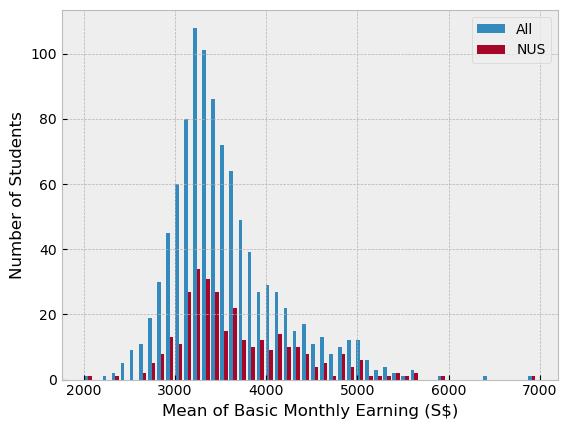

In [5]:
data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data['All'] = np.loadtxt(filename, skiprows = 1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data['NUS'] = np.loadtxt(filename, skiprows = 1)

plt.style.use('bmh')

plt.hist([data['All'], data['NUS']],
        bins = 50,
        label = ['All', 'NUS']
        )

plt.xlabel('Mean of Basic Monthly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


### 4.2 Scatter plots

C:\Users\Hasanah\AppData\Local\Temp\ipykernel_17188\1860347317.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


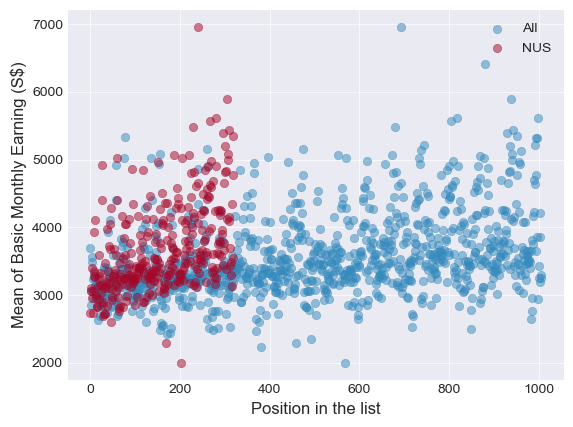

In [7]:
data = {}
for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.csv'
    data[label] = np.loadtxt(filename, skiprows = 1)

plt.style.use('seaborn-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label = label, alpha = 0.5)
    
plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earning (S$)')
plt.legend()
plt.show()


### 4.3 Bar charts

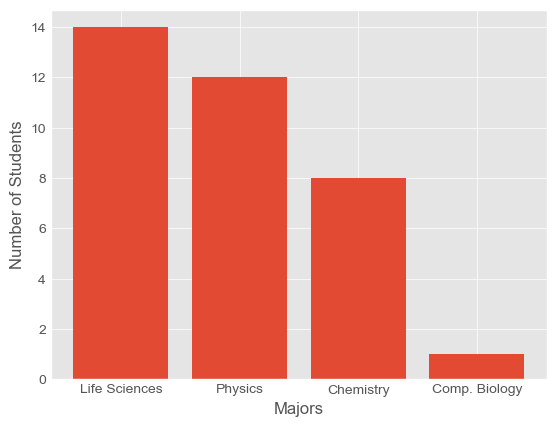

In [8]:
student_numbers = {'Life Sciences': 14,
                  'Physics': 12, 
                  'Chemistry': 8,
                  'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()

### 4.4 Pie charts

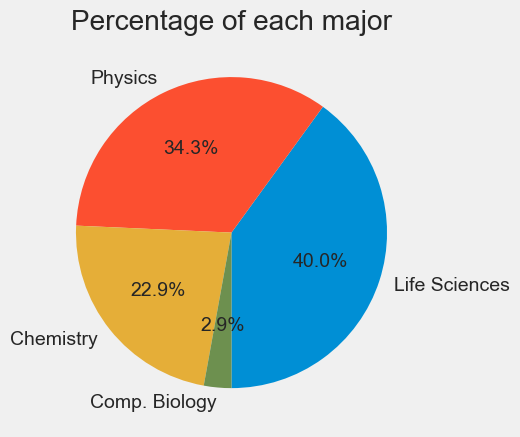

In [9]:
student_numbers = {'Life Sciences': 14,
                  'Physics': 12, 
                  'Chemistry': 8,
                  'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers,
       labels = majors,
       autopct = '%1.1f%%',
       startangle = -90
       )

plt.title('Percentage of each major')
plt.show()


## Exercise 1 :  Plotting data from files

In [18]:
plt.style.use('default')

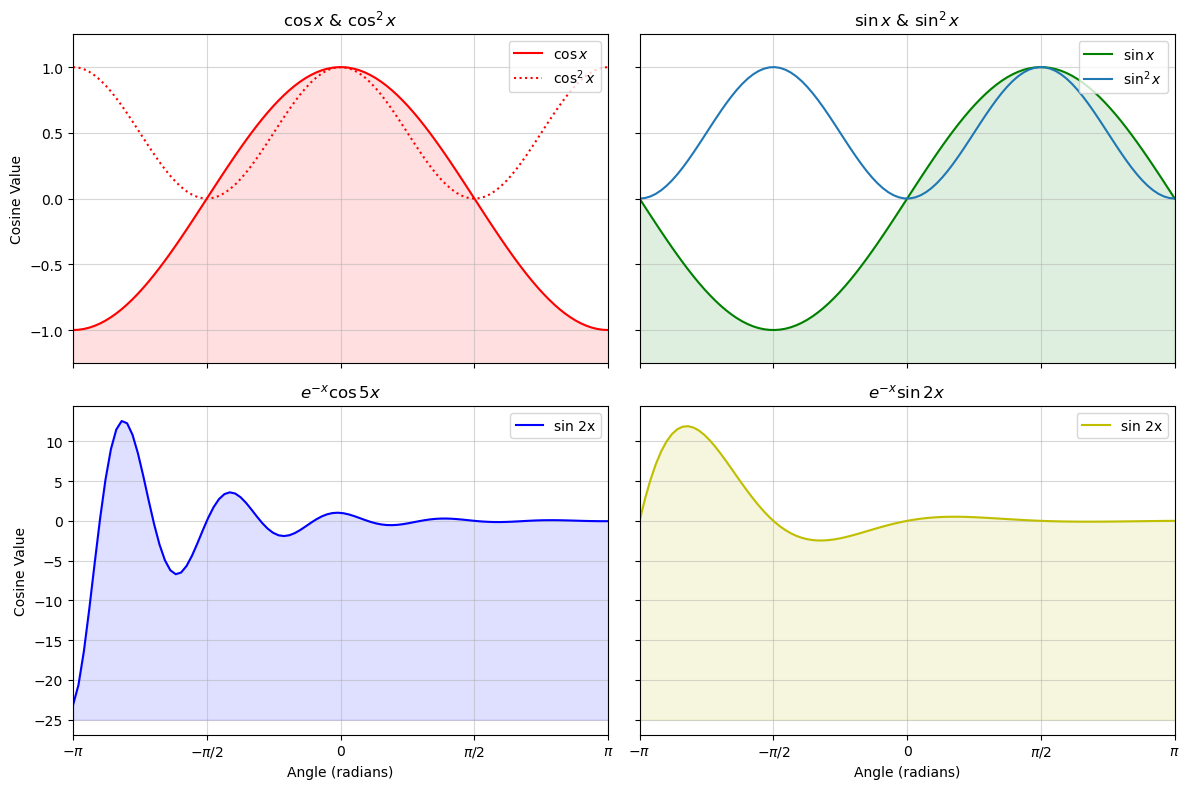

In [60]:
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8),  sharey='row',
                        sharex = True)

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$')
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].fill_between(x, cos_x, -2, color='r', alpha=.125)
axes[0, 0].legend(loc = 'upper right')
axes[0, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[0, 0].set_xlim(-np.pi, np.pi)

#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label='$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].set_title('$\sin x$ & $\sin^2x$')
axes[0, 1].plot(x, sin_x**2, label='$\sin^2 x$')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].legend(loc='upper right', frameon= True)
axes[0, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
 
#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$e^{-x}\cos 5x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_yticks([-25, -20, -15, -10, -5, 0, 5, 10])
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend(['sin 2x'])

#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label='$e^{-x}\sin 2x$')
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].legend(['sin 2x'])
axes[1, 1].set_xlabel('Angle (radians)')

# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)

plt.tight_layout()
plt.show()